# تولید داده‌های جعلی با استفاده از کتابخانه Faker
این نوت‌بوک با هدف تولید داده‌های ساختگی (جعلی) برای تست یا توسعه سیستم‌ها طراحی شده است. از کتابخانه `Faker` برای تولید داده‌های جعلی مانند نام، ایمیل، شماره تلفن و ... استفاده شده است.


## نصب و ایمپورت کتابخانه‌های موردنیاز
در این بخش، کتابخانه‌هایی که برای تولید داده و پردازش نیاز داریم نصب و وارد می‌کنیم.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

## تعریف یک تابع برای تولید داده‌های جعلی
در این تابع با استفاده از `Faker` داده‌هایی مثل نام، ایمیل، آدرس، شماره تلفن و ... تولید می‌شود.

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

## نمونه‌سازی داده‌ها
در این قسمت تابع قبلی را صدا می‌زنیم و چند ردیف داده‌ی جعلی تولید می‌کنیم.

In [ ]:
print(digits.data.shape, digits.target.shape)

(1797, 64) (1797,)


## ذخیره‌سازی داده‌ها
در نهایت داده‌های تولیدشده را به صورت یک فایل CSV ذخیره می‌کنیم.

(1797, 8, 8)
7


<Figure size 640x480 with 0 Axes>

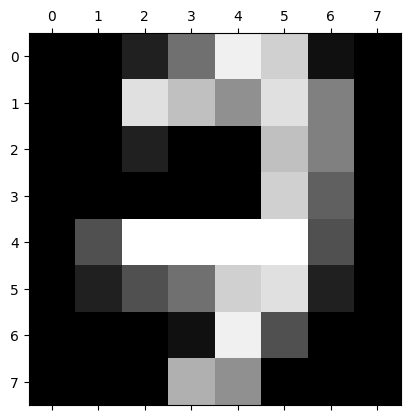

In [ ]:
print(digits.images.shape)
print(digits.target[86])
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[86])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , recall_score , precision_score

def calculate_matrics(y_test, y_pred_test , y_train , y_pred_rain):
  acc_train = accuracy_score(y_train, y_pred_train)
  acc_test = accuracy_score(y_test, y_pred_test)
  p = precision_score(y_test, y_pred_test, average='macro')
  r = recall_score(y_test, y_pred_test, average='macro')
  print(f'acc of train data={acc_train}')
  print(f'acc of test data={acc_test}')
  print(f'precision={p}')
  print(f'recall={r}')
  return acc_train , acc_test , p , r

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=128,n_estimators=256)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
acc_train_rf , acc_test_rf , p_rf , r_rf = calculate_matrics(y_test, y_pred_test , y_train , y_pred_train)

acc of train data=1.0
acc of test data=0.9805555555555555
precision=0.9820513503824039
recall=0.9792881105585278


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)


SVC(kernel='poly')

In [ ]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
acc_train_svm , acc_test_svm , p_svm , r_svm = calculate_matrics(y_test, y_pred_test , y_train , y_pred_train)

acc of train data=0.9993041057759221
acc of test data=0.9888888888888889
precision=0.9882752613240419
recall=0.9872160023884163


In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(150,150,150))
ann.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 150, 150))

In [ ]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)
acc_train_ann , acc_test_ann , p_ann , r_ann = calculate_matrics(y_test, y_pred_test , y_train , y_pred_train)

acc of train data=1.0
acc of test data=0.9861111111111112
precision=0.9870191409897291
recall=0.9844112632678875


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
acc_train_knn , acc_test_knn , p_knn , r_knn = calculate_matrics(y_test, y_pred_test , y_train , y_pred_train)

acc of train data=0.9909533750869868
acc of test data=0.9861111111111112
precision=0.9867976702876273
recall=0.9847768323630393


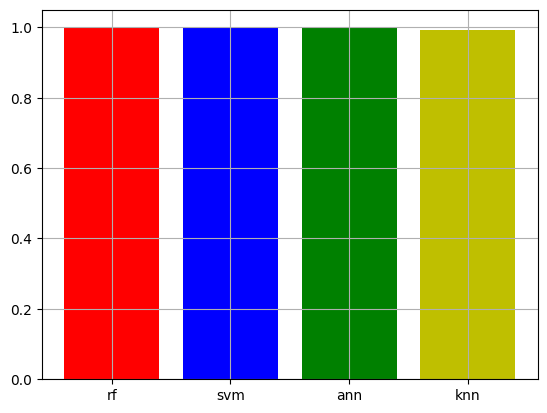

In [ ]:
import matplotlib.pyplot as plt
acc_train=[acc_train_rf,acc_train_svm,acc_train_ann,acc_train_knn]
title=['rf','svm','ann','knn']
colors=['r','b','g','y']
plt.bar(title, acc_train , color=colors)
plt.grid()
plt.show()

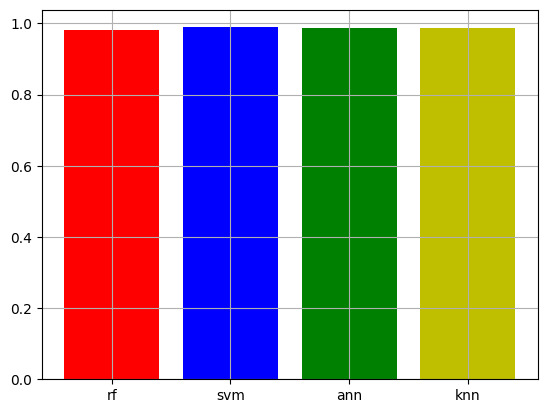

In [ ]:
import matplotlib.pyplot as plt
acc_test=[acc_test_rf,acc_test_svm,acc_test_ann,acc_test_knn]
title=['rf','svm','ann','knn']
colors=['r','b','g','y']
plt.bar(title, acc_test , color=colors)
plt.grid()
plt.show()

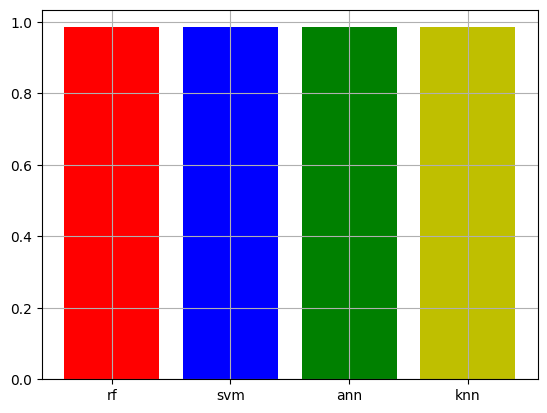

In [ ]:
import matplotlib.pyplot as plt
acc_test=[r_rf,r_svm,r_ann,r_knn]
title=['rf','svm','ann','knn']
colors=['r','b','g','y']
plt.bar(title, r , color=colors)
plt.grid()
plt.show()

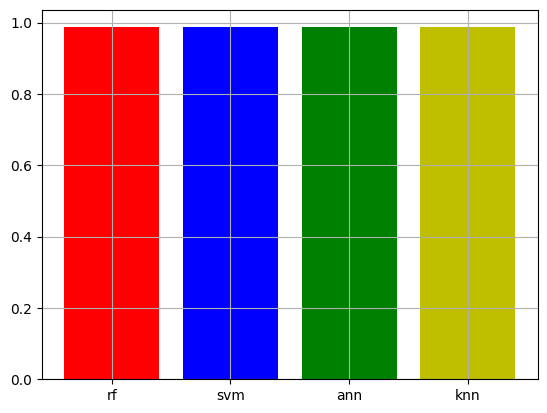

In [ ]:
import matplotlib.pyplot as plt
acc_test=[p_rf,p_svm,p_ann,p_knn]
title=['rf','svm','ann','knn']
colors=['r','b','g','y']
plt.bar(title, p , color=colors)
plt.grid()
plt.show()